In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,recall_score,precision_score,ConfusionMatrixDisplay

# Load DataSet

In [2]:
df=pd.read_csv("loanfile.csv")

In [3]:
# Top 10 records
df.head(100)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,LP001326,Male,No,0,Graduate,NaN,6782,0.0,NaN,360.0,NaN,Urban,N
96,LP001327,Female,Yes,0,Graduate,No,2484,2302.0,137.0,360.0,1.0,Semiurban,Y
97,LP001333,Male,Yes,0,Graduate,No,1977,997.0,50.0,360.0,1.0,Semiurban,Y
98,LP001334,Male,Yes,0,Not Graduate,No,4188,0.0,115.0,180.0,1.0,Semiurban,Y


In [4]:
df.shape
# There are 614 rows and 13 columns

(614, 13)

In [5]:
# Basic Information 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
# Basic Statistics
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
# Check Missing Values
df.isnull().any()
# Gender,Education,Application Income,Co Application Income,Property Area,Loan Status have Missing Values

Loan_ID              False
Gender                True
Married               True
Dependents            True
Education            False
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount            True
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
Loan_Status          False
dtype: bool

In [8]:
# Check Class Imbalance
df[["Loan_Status"]].value_counts()
# This shows there is a class imbalance of Loan Status Yes and No

Loan_Status
Y              422
N              192
dtype: int64

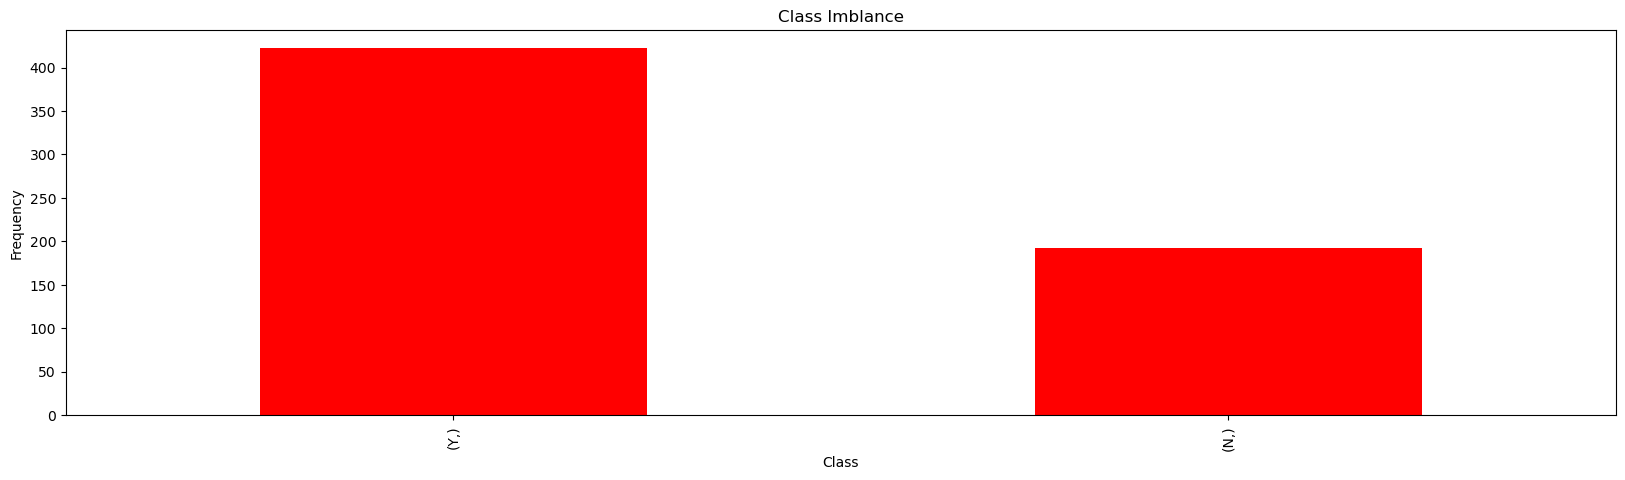

In [9]:
# # Visual inspection: Plot class distribution
plt.figure(figsize=(20,5))
df[["Loan_Status"]].value_counts().plot(kind='bar', color='red')
plt.title("Class Imblance")
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

In [10]:
# Count No of Missing Values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [11]:
# Replacing Null Values in "Loan Amount" with mean value of "Loan Amount"
train=df
# loan Amount With Mean
#
train.fillna(value={"LoanAmount": train["LoanAmount"].mean()},inplace=True)
train.fillna(value={"Credit_History":train["Credit_History"].median()},inplace=True)
train.fillna(value={"Self_Employed":train["Self_Employed"].mode()},inplace=True)

In [12]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [13]:
# Drop Those rows where null values are available
train.dropna(inplace=True)
print(f" The shape of dataset after dropping Null values :{train.shape}")
print("The Sum of Null values of all the columns :")
train.isnull().sum()

 The shape of dataset after dropping Null values :(542, 13)
The Sum of Null values of all the columns :


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

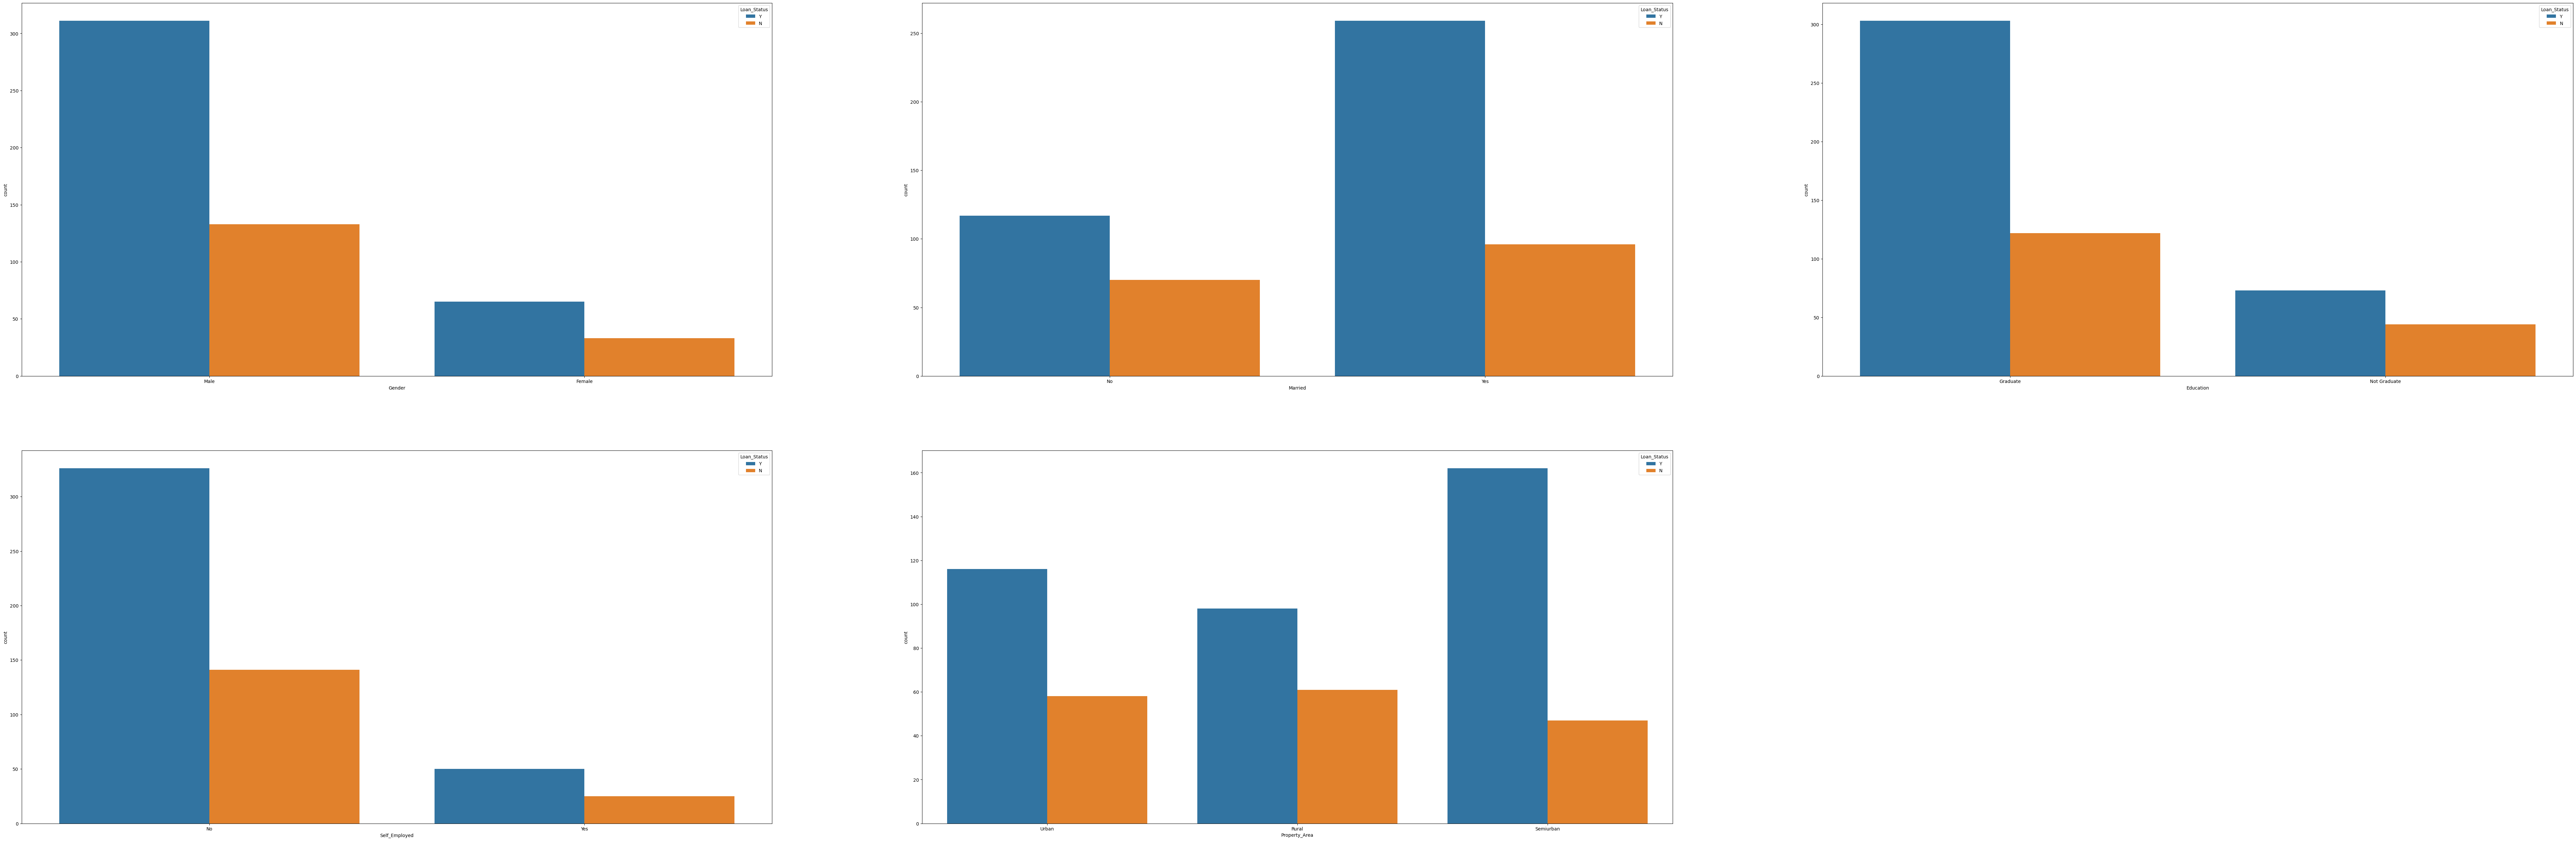

In [14]:
# 
plt.figure(figsize=(100,50))
plt.subplot(331)
sns.countplot(train["Gender"],hue=train["Loan_Status"])

plt.subplot(332)
sns.countplot(train["Married"],hue=train["Loan_Status"])

plt.subplot(333)
sns.countplot(train["Education"],hue=train["Loan_Status"])

plt.subplot(334)
sns.countplot(train["Self_Employed"],hue=train["Loan_Status"])

plt.subplot(335)
sns.countplot(train["Property_Area"],hue=train["Loan_Status"])

plt.show()

In [15]:
# lets change the Loan Status Y to 1 and N to 0
train["Loan_Status"].replace("Y",1,inplace=True)
train["Loan_Status"].replace("N",0,inplace=True)

In [16]:
# Lets Change the Categorial Value in 0,1,2... form

#Gender Male :1,Female :0
train["Gender"]=train["Gender"].map({"Male" :1,"Female":0})
train["Married"]=train["Married"].map({"No" :0,"Yes":1})
train["Education"]=train["Education"].map({"Graduate" :1,"Not Graduate":0})
train["Self_Employed"]=train["Self_Employed"].map({"No" :0,"Yes":1})
train["Property_Area"]=train["Property_Area"].map({"Urban" :1,"Semiurban":2,"Rural":0})
train["Dependents"]=train["Dependents"].map({"0" :0,"1":1,"2":2,"3":3,"3+":3})

# Now it’s time to begin implementing machine learning.

In [17]:
X_train,X_test,Y_train,Y_test =train_test_split(train[["Gender","Married","Dependents","Education","Self_Employed",
                                                    "ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term",
                                                    "Credit_History","Property_Area"]],train["Loan_Status"],
                                               random_state=42,test_size=0.20)

In [18]:
print(f"The Shape of X_train: {X_train.shape}")
print(f"The Shape of X_test: {X_test.shape}")
print(f"The Shape of Y_train: {Y_train.shape}")
print(f"The Shape of Y_test: {Y_test.shape}")

The Shape of X_train: (433, 11)
The Shape of X_test: (109, 11)
The Shape of Y_train: (433,)
The Shape of Y_test: (109,)


# Logistic Regression :

In [19]:
model= LogisticRegression()

In [20]:
# Now let us train the model, with our training values(X_train , Y_train)
LR = model.fit(X_train, Y_train)
y_predict =model.predict(X_test)

In [21]:
y_train_prediction =model.predict(X_train)
accuracy=accuracy_score(Y_train,y_train_prediction)
print(f"The Accuracy Score on Training Dataset :{accuracy}")

The Accuracy Score on Training Dataset :0.8060046189376443


In [22]:
accuracy=accuracy_score(Y_test,y_predict)
print(f"The Accuracy Score on Testing Dataset :{accuracy}")
precision=precision_score(Y_test,y_predict)
recall =recall_score(Y_test,y_predict)
f1_score=f1_score(Y_test,y_predict)
print(f"The Precision Score on Testing Dataset :{precision}")
print(f"The recall Score on Testing Dataset :{recall}")
print(f"The f1 Score on Testing Dataset :{f1_score}")

The Accuracy Score on Testing Dataset :0.7981651376146789
The Precision Score on Testing Dataset :0.8
The recall Score on Testing Dataset :0.9473684210526315
The f1 Score on Testing Dataset :0.8674698795180723


In [23]:
con_mat=confusion_matrix(Y_test,y_predict)

In [24]:
con_mat

array([[15, 18],
       [ 4, 72]], dtype=int64)

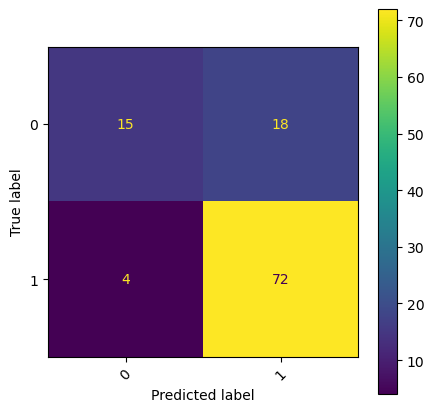

In [25]:
disp = ConfusionMatrixDisplay(confusion_matrix=con_mat, display_labels= [0, 1])
disp.plot(xticks_rotation=45)
fig = disp.ax_.get_figure()
fig.set_figwidth(5)
fig.set_figheight(5)
plt.show()

In [26]:
# Checking for Random Dataset
# Checking for a Random Person:
X_test
input_data =(1,1,1,1,1,1,1,1,1,1,1)
input_data_as_numpy_array = np.asarray(input_data)
input_data_as_numpy_array=input_data_as_numpy_array.reshape(1,-1)
input_data_as_numpy_array

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])

In [27]:
model.predict(input_data_as_numpy_array)

array([1], dtype=int64)